In [1]:
import numpy as np
import cvxpy as cp

import matplotlib.pyplot as plt

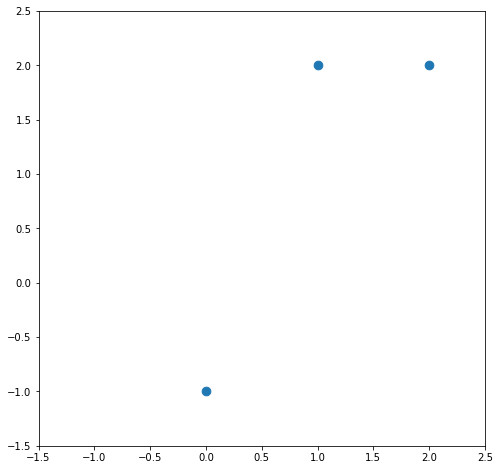

In [2]:
points = [
    np.array([1,2]),
    np.array([2,2]),
    np.array([0,-1]),
]
plt.figure(figsize=(8,8))
plt.scatter([x[0] for x in points],[x[1] for x in points], s=75)
plt.xlim((-1.5,2.5))
plt.ylim((-1.5,2.5));

In [3]:
# Define the decision variables
r = cp.Variable(nonneg=True)
center = cp.Variable(2)

In [4]:
# Define the objective
objective = cp.Minimize(r)

In [5]:
# Define the constraints
constraints = [
    r>=cp.norm(center-x) for x in points
]

In [6]:
# formulate the problem and solve it
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.MOSEK, verbose=False)

1.8027756184004315

In [7]:
# get the optimal decision values
print(r.value)
print(center.value)

1.8027756184004315
[1.00009595 0.499936  ]


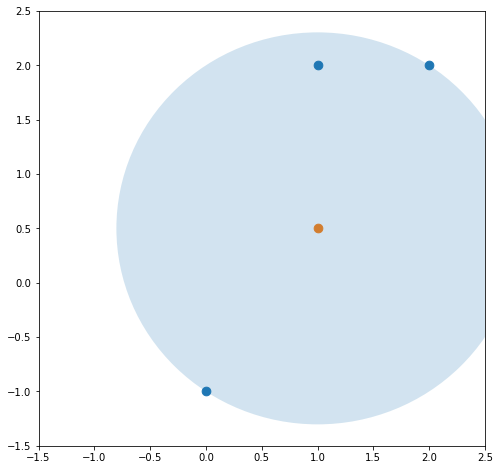

In [8]:
plt.figure(figsize=(8,8))
plt.scatter([x[0] for x in points],[x[1] for x in points], s=75)
plt.scatter([center.value[0]],[center.value[1]], s=75)
circle = plt.Circle(center.value, r.value, alpha=0.2)

plt.gca().add_patch(circle)
plt.xlim((-1.5,2.5))
plt.ylim((-1.5,2.5));